# Trabalhando os dados

## Carregando o dataset

In [23]:
import pandas as pd
import numpy as np

In [24]:
ds = pd.read_csv('dataset/train_corrigido.csv', header=0)
print(ds.shape)
ds.head(5)

/tmp/ipykernel_30602/1130610560.py:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv('dataset/train_corrigido.csv', header=0)


(177024, 509)


,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,id_num
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,0
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,1
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,2
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,3
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,4


## Preenchendo os nulos com zero (com exceção das colunas de Atividade Física)

In [25]:
for prefix in ['bg-', 'insulin-', 'carbs-', 'hr-', 'steps-', 'cals-']:
    cols_to_fill = [col for col in ds.columns if col.startswith(prefix)]

    ds.loc[:, cols_to_fill] = ds.loc[:, cols_to_fill].fillna(0.0)

ds.head(5)

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,id_num
0,p01_0,p01,06:10:00,0.0,0.0,9.6,0.0,0.0,9.7,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,0
1,p01_1,p01,06:25:00,0.0,0.0,9.7,0.0,0.0,9.2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,1
2,p01_2,p01,06:40:00,0.0,0.0,9.2,0.0,0.0,8.7,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,2
3,p01_3,p01,06:55:00,0.0,0.0,8.7,0.0,0.0,8.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,3
4,p01_4,p01,07:10:00,0.0,0.0,8.4,0.0,0.0,8.1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,4


## Preencher com "other" as ativiades físicas nulas

In [26]:
cols_to_fill = [col for col in ds.columns if col.startswith('activity-')]

ds.loc[:, cols_to_fill] = ds.loc[:, cols_to_fill].fillna('other')

## Convertendo o time num inteiro crescente

In [27]:
ds['minutes_since_start'] = pd.to_datetime(ds['time'], format="%H:%M:%S").dt.hour * 60 + pd.to_datetime(ds['time'], format="%H:%M:%S").dt.minute
ds = ds.drop(columns=['time'])
ds.head(5)

,id,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,id_num,minutes_since_start
0,p01_0,p01,0.0,0.0,9.6,0.0,0.0,9.7,0.0,0.0,...,other,other,other,other,other,other,other,13.4,0,370
1,p01_1,p01,0.0,0.0,9.7,0.0,0.0,9.2,0.0,0.0,...,other,other,other,other,other,other,other,12.8,1,385
2,p01_2,p01,0.0,0.0,9.2,0.0,0.0,8.7,0.0,0.0,...,other,other,other,other,other,other,other,15.5,2,400
3,p01_3,p01,0.0,0.0,8.7,0.0,0.0,8.4,0.0,0.0,...,other,other,other,other,other,other,other,14.8,3,415
4,p01_4,p01,0.0,0.0,8.4,0.0,0.0,8.1,0.0,0.0,...,other,other,other,other,other,other,other,12.7,4,430


## Removendo as colunas de identificação

In [28]:
cols_to_pop = ['id', 'p_num']
identificadores = ds[cols_to_pop].copy()
ds = ds.drop(columns=cols_to_pop)
ds.head(5)

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,id_num,minutes_since_start
0,0.0,0.0,9.6,0.0,0.0,9.7,0.0,0.0,9.2,0.0,...,other,other,other,other,other,other,other,13.4,0,370
1,0.0,0.0,9.7,0.0,0.0,9.2,0.0,0.0,8.7,0.0,...,other,other,other,other,other,other,other,12.8,1,385
2,0.0,0.0,9.2,0.0,0.0,8.7,0.0,0.0,8.4,0.0,...,other,other,other,other,other,other,other,15.5,2,400
3,0.0,0.0,8.7,0.0,0.0,8.4,0.0,0.0,8.1,0.0,...,other,other,other,other,other,other,other,14.8,3,415
4,0.0,0.0,8.4,0.0,0.0,8.1,0.0,0.0,8.3,0.0,...,other,other,other,other,other,other,other,12.7,4,430


## Trocando as colunas de atividade por um valor inteiro

In [29]:
# ds['activity-0:00'].unique()
mapeamento = {
    'other': 0, 'Walk': 1, 'Indoor climbing': 2, 'Yoga': 3, 'Zumba': 4, 'HIIT': 5,
    'Dancing': 6, 'Swim': 7, 'Outdoor Bike': 8, 'Aerobic Workout': 9, 'Sport': 10,
    'Walking': 11, 'Running': 12, 'Swimming': 13, 'Run': 14, 'Weights': 15, 'Workout': 16,
    'Tennis': 17, 'Strength training': 18, 'Stairclimber': 19, 'Spinning': 20, 'Hike': 21,
    'Bike':21
}

prefix = 'activity-'
cols_to_map = [col for col in ds.columns if col.startswith(prefix)]
ds[cols_to_map] = ds[cols_to_map].apply(lambda col: col.map(mapeamento))

ds.head(5)

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,id_num,minutes_since_start
0,0.0,0.0,9.6,0.0,0.0,9.7,0.0,0.0,9.2,0.0,...,0,0,0,0,0,0,0,13.4,0,370
1,0.0,0.0,9.7,0.0,0.0,9.2,0.0,0.0,8.7,0.0,...,0,0,0,0,0,0,0,12.8,1,385
2,0.0,0.0,9.2,0.0,0.0,8.7,0.0,0.0,8.4,0.0,...,0,0,0,0,0,0,0,15.5,2,400
3,0.0,0.0,8.7,0.0,0.0,8.4,0.0,0.0,8.1,0.0,...,0,0,0,0,0,0,0,14.8,3,415
4,0.0,0.0,8.4,0.0,0.0,8.1,0.0,0.0,8.3,0.0,...,0,0,0,0,0,0,0,12.7,4,430


# Montando o modelo

## Separando treino e teste

In [30]:
train = ds
# test = ds.drop(train.index)

In [31]:
x_train = train
y_train = train.pop('bg+1:00')

In [32]:
print(x_train.shape)
x_train.head(5)

(177024, 506)


,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,id_num,minutes_since_start
0,0.0,0.0,9.6,0.0,0.0,9.7,0.0,0.0,9.2,0.0,...,0,0,0,0,0,0,0,0,0,370
1,0.0,0.0,9.7,0.0,0.0,9.2,0.0,0.0,8.7,0.0,...,0,0,0,0,0,0,0,0,1,385
2,0.0,0.0,9.2,0.0,0.0,8.7,0.0,0.0,8.4,0.0,...,0,0,0,0,0,0,0,0,2,400
3,0.0,0.0,8.7,0.0,0.0,8.4,0.0,0.0,8.1,0.0,...,0,0,0,0,0,0,0,0,3,415
4,0.0,0.0,8.4,0.0,0.0,8.1,0.0,0.0,8.3,0.0,...,0,0,0,0,0,0,0,0,4,430


In [33]:
print(y_train.shape)
y_train.head(5)

(177024,)


0    13.4
1    12.8
2    15.5
3    14.8
4    12.7
Name: bg+1:00, dtype: float64

## Construindo o modelo

In [34]:
from keras.layers import TimeDistributed, Dense, Input, Lambda, BatchNormalization, Concatenate, Conv1D, ZeroPadding1D
from keras.models import Model
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Configurando para não alocar diretamente toda a memória da GPU (alocar conforme necessário)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  # Aloca memória conforme necessário
    except RuntimeError as e:
        print(e)

Num GPUs Available:  1


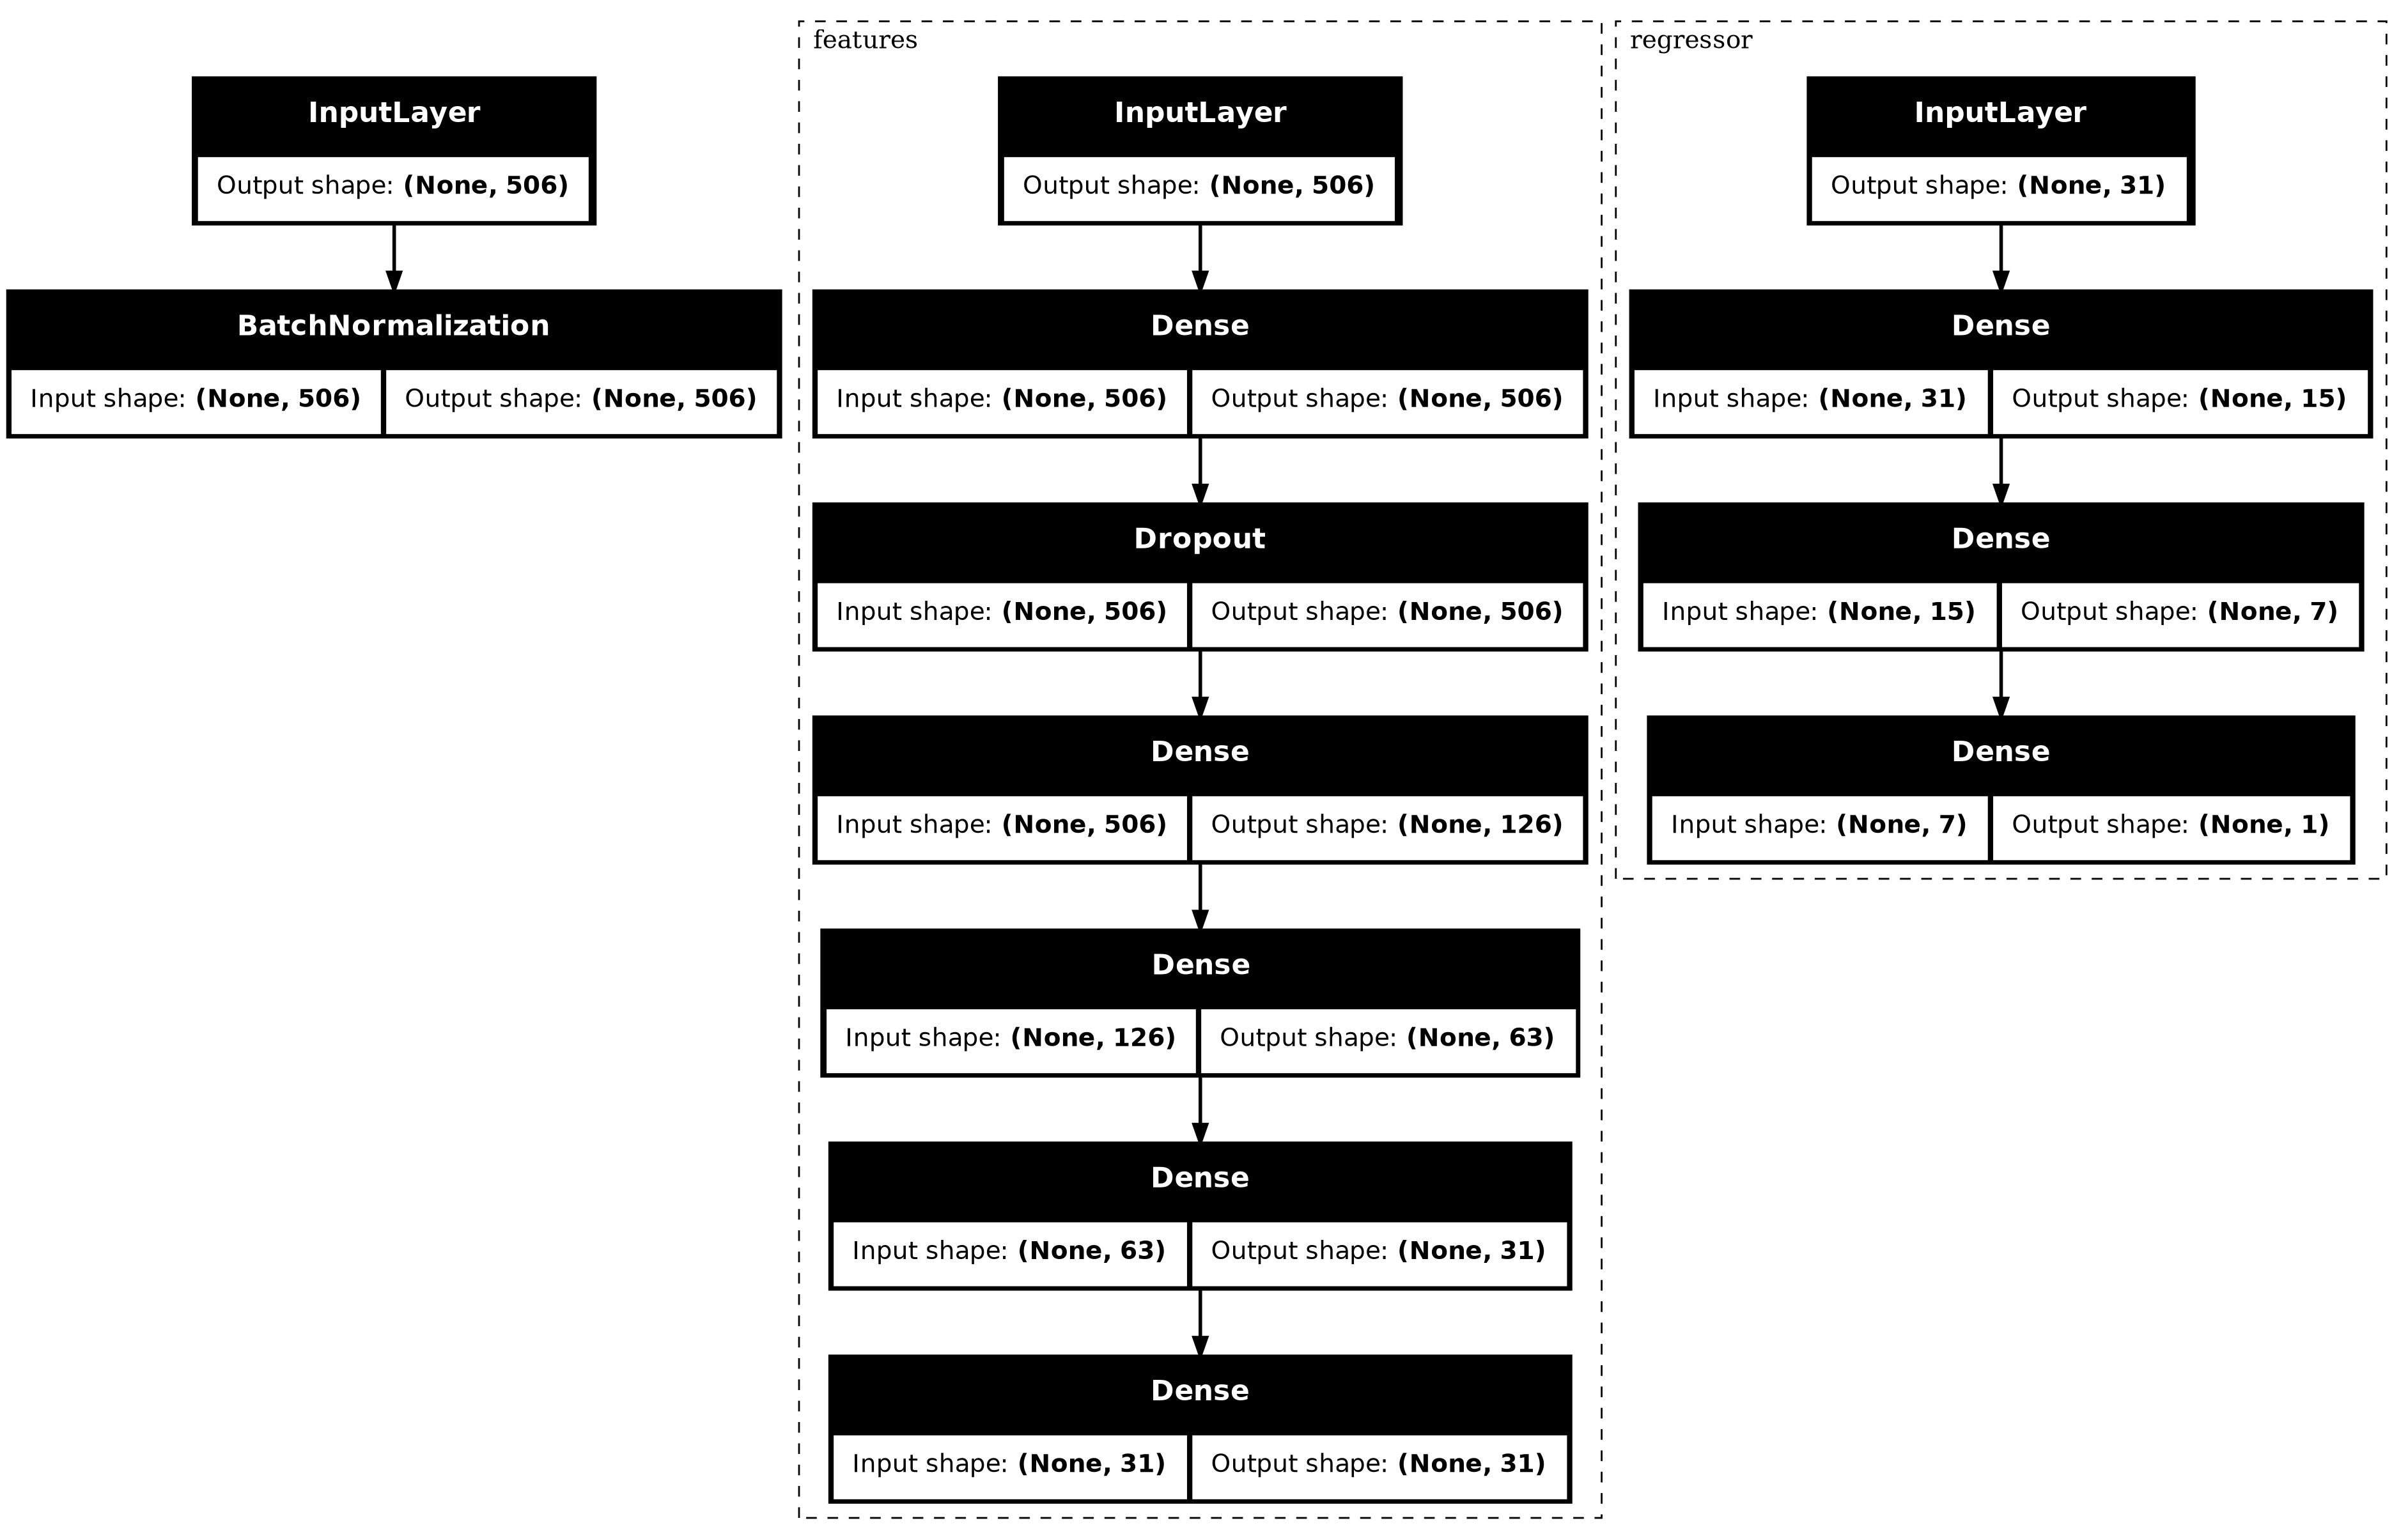

In [35]:
def extrator_features(input_dims, activation, bias):
  input_layer = Input(shape=[input_dims])

  x_0 = Dense(int(input_dims), activation=activation, use_bias=bias, kernel_regularizer="l2")(input_layer)
  x_1 = tf.keras.layers.Dropout(0.2)(x_0)
  x_2 = Dense(int(input_dims/4), activation=activation, use_bias=bias)(x_1)
  x_3 = Dense(int(input_dims/8), activation=activation, use_bias=bias)(x_2)
  x_4 = Dense(int(input_dims/16), activation=activation, use_bias=bias)(x_3)
  x_bottleneck = Dense(int(input_dims/16), activation=activation, name='encoder', use_bias=True, kernel_regularizer="l1")(x_4)

  return Model(input_layer, x_bottleneck, name="features")

def regressor(input_dims, output_dims, activation, bias):
  input_layer = Input(shape=[input_dims])

  x_0 = Dense(int(input_dims/2), activation=activation, use_bias=bias)(input_layer)
  x_2 = Dense(int(input_dims/4), activation=activation, use_bias=bias)(x_0)
  saidas = Dense(output_dims, activation=None, name='regressor_saidas', use_bias=bias)(x_2)

  return Model(input_layer, saidas, name="regressor")

def build_models(input_dims, output_dims, activation, bias):
  # Camadas de entrada
  input_layer = Input(shape=[input_dims])

  x_n = BatchNormalization()(input_layer)

  # Kernels
  extrator = extrator_features(input_dims, activation, bias)

  # Features
  features = extrator(x_n)

  # Regressão
  regressao = regressor(features.shape[1], output_dims, activation, bias)

  saida = regressao(features)
  
  return (
      Model(input_layer, saida, name="regressao"),
      Model(input_layer, features, name="projecao")
  )

model, features = build_models(x_train.shape[1], 1, 'relu', False)
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse', 'mean_absolute_percentage_error'])
plot_model(model, show_shapes=True, expand_nested=True)

## Treinando o modelo

In [36]:
# Callback para recuperar o melhor peso, e parar quando ficar três épocas sem melhora
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)

# Treinando o modelo
history = model.fit(x_train, y_train, epochs=200, callbacks=[callback])

Epoch 1/200
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 6s 804us/step - loss: 9.6050 - mae: 1.9460 - mean_absolute_percentage_error: 25.3437 - mse: 6.8034
Epoch 2/200
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 4s 694us/step - loss: 5.5839 - mae: 1.6752 - mean_absolute_percentage_error: 22.1220 - mse: 4.9946
Epoch 3/200
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 4s 694us/step - loss: 5.1630 - mae: 1.6212 - mean_absolute_percentage_error: 21.5031 - mse: 4.6918
Epoch 4/200
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 4s 685us/step - loss: 5.0114 - mae: 1.5972 - mean_absolute_percentage_error: 21.2005 - mse: 4.5904
Epoch 5/200
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 4s 682us/step - loss: 4.9104 - mae: 1.5814 - mean_absolute_percentage_error: 20.9203 - mse: 4.5088
Epoch 6/200
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 4s 670us/step - loss: 4.8280 - mae: 1.5739 - mean_absolute_percentage_error: 20.8008 - mse: 4.4411
Epoch 7/200
5532/5532 ━━━━━━━━━━━━━━━━━━━━ 4s 678us/step - loss: 4.7827 - mae: 1.5656 - mean_absolute_percentage_error: 20.7260 - mse: 4.4033
Epoch 

In [37]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['rmse'] = np.sqrt(hist['mse'])
# hist['val_rmse'] = np.sqrt(hist['val_mse'])
hist.tail()

,loss,mae,mean_absolute_percentage_error,mse,epoch,rmse
136,4.513255,1.508834,19.963648,4.095478,136,2.023729
137,4.521309,1.509579,19.964569,4.099635,137,2.024755
138,4.511233,1.508367,19.951208,4.086260,138,2.021450
139,4.514277,1.508860,19.956703,4.094261,139,2.023428
140,4.509009,1.506214,19.923208,4.083597,140,2.020791


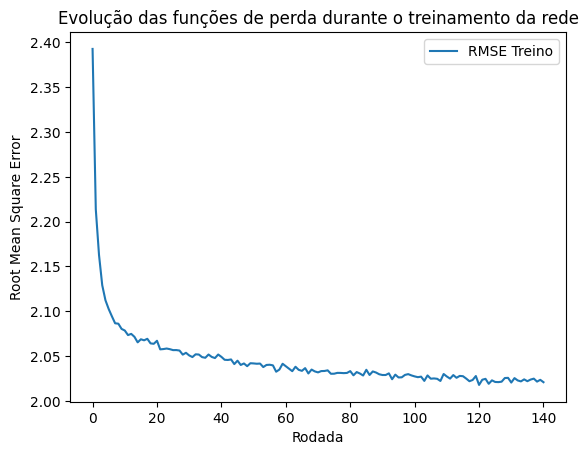

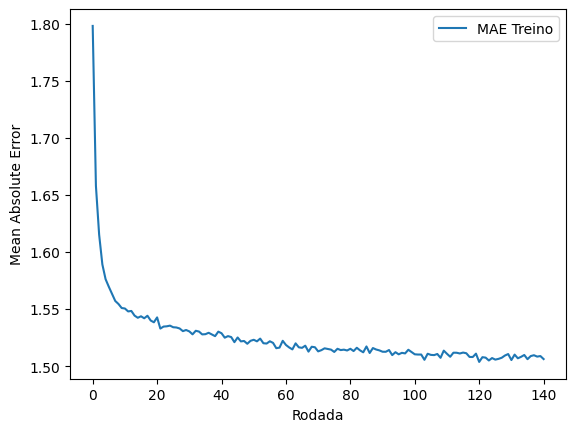

In [38]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Evolução das funções de perda durante o treinamento da rede")
plt.xlabel('Rodada')
plt.ylabel('Root Mean Square Error')
plt.plot(hist['epoch'], hist['rmse'], label='RMSE Treino')
# plt.plot(hist['epoch'], hist['val_rmse'], label = 'RMSE Validação')
plt.legend()

plt.figure()
plt.xlabel('Rodada')
plt.ylabel('Mean Absolute Error')
plt.plot(hist['epoch'], hist['mae'], label='MAE Treino')
# plt.plot(hist['epoch'], hist['val_mae'], label = 'MAE Validação')
plt.legend()

plt.show()

## Avaliando o modelo nos dados de teste

### Ajustando a base de teste

In [39]:
# x_test = test
# y_test = test.pop('bg+1:00')
# print(x_test.shape)
# x_test.head(5)

In [40]:
# y_test.head(5)

### Prevendo para a base de teste

In [41]:
# y_pred = model.predict(x_test)
# print(y_pred)

### Calculando o erro para a base de teste

In [42]:
# mse = tf.keras.losses.MSE(y_test, y_pred).numpy().mean()
# mae = tf.keras.losses.MAE(y_test, y_pred).numpy().mean()
# rmse = np.sqrt(mse)

In [43]:
# print(f"RMSE Test: {rmse}")
# print(f"MSE Test: {mse}")
# print(f"MAE Test: {mae}")

## Salvando o modelo em arquivo

In [44]:
model.save("brist1d.keras")